# AI_05_김민주_Section4

# 1. 문제 정의
- 파파고와 구글 번역기를 통해 다른 언어를 말하고 있더라도 우리는 서로 소통할 수 있게되었습니다. 하지만 만약 언어를 '말하지 못하는' 사람들의 경우 어떨까요? '수화'는 청각 장애가 있는 사람들이나 말하는데 어려움을 갖는 사람들이 손과 손가락의 모양, 손바닥의 방향, 손의 위치, 손의 움직임을 달리 하여 의미를 전달하는 언어입니다. 하지만 수화는 수화를 사용하지 않는 사람들에게는 장벽이 높습니다. 이는 청각장애인과 비청각장애인의 소통을 단절시키고 나아가 서로에 대한 이햐를 할 수 없게 만듭니다. 
- 만약 딥러닝 기술을 통해 수화라는 언어를 비청각장애인도 쉽게 이해할 수 있게 해준다면 어떨까요? CNN 의 Multipl Image Classification 기술을 사용해서 수화를 비청각장애인도 쉽게 이해할 수 있는 글자로 변환한다면 '수화'라는 언어의 장벽을 깨고 수화를 모르는 사람도 수화를 사용하는 사람과 쉽게 소통할 수 있고 서로를 이해할 수 있는 더 나은 세상을 만들수 있을 것입니다

# 2. 관심 데이터 선정
- Sign Language MNIST
- 출처 : https://www.kaggle.com/datamunge/sign-language-mnist

# 3. 데이터 선정 이유
- 먼저 3일이라는 짧은 기간동안 딥러닝 기술들을 최대한 적용해 볼 수 있는 간단하면서도 많은 양의 데이터를 고르고 싶었습니다. 그 중에서 평소에 갖고 있던 아이디어인 '수화를 비청각자애인들도 바로 이해할 수 있게 번역하는 것'을 이번 프로젝트에서 구현해보고 싶었습니다. 그래서 kaggle 에서 Sign MINST 데이터를 고르게 되었습니다.
- Multiple Image Classification 을 통해서 수화 이미지를 통해 바로 언어(영어)로 바꿀 수 있다면 이는 많은 분야에 적용될 수 있을것입니다.

# 4. 데이터를 이용한 가설 수립
- Sign Language MNIST 데이터를 Multiple Image Classification 할 때 단일 모델보다 앙상블 모델이 훨씬 더 좋은 성능을 낼 것이다. -> 앙상블 모델이 더 좋은 성능을 냄을 확인했습니다.
- Image Classification 기술을 더 발전시켜 Object detection 을 활용해 Real-time 으로 수화를 번역할 수 있다 -> 추후 해결 및 성장 방안에서 다뤘습니다.

# 5. 데이터 전처리 및 EDA



In [1]:
!pip install keras.utils
import keras.utils

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Train test split
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import KFold

In [3]:
# pd.read_csv train and test data
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [4]:
# dataframe check
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


In [5]:
# shape check
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [6]:
# Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

In [7]:
# Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  F


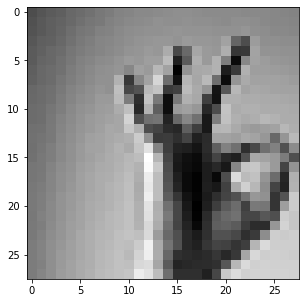

In [8]:
# Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(5,5))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap="gray") 
print("Label for the image is: ", class_names[int(train_data[i,0])])

- train 데이터가 온전한지 확인합니다. 
- 이미지를 랜덤으로 뽑아서 확인합니다. 결과적으로 train 데이터는 온전합니다.

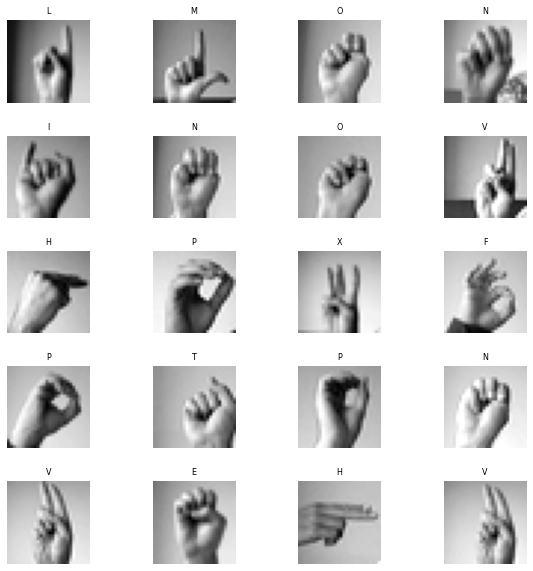

In [12]:
# train_data sample check
W_grid = 4
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(train_data[index,1:].reshape((28,28)), cmap="gray" )
    label_index = int(train_data[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

- train 에서 샘플 이미지를 몇개 더 출력해봅니다.
- 각각의 수화 이미지가 모두 알맞은 알파벳을 가리킵니다.

In [13]:
# labeling train label
labels_train = train['label'].values

# label unique value check
unique_value = np.array(labels_train)
np.unique(unique_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [14]:
# labeling train label
labels_test = test['label'].values

# label unique value check
unique_value = np.array(labels_test)
np.unique(unique_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

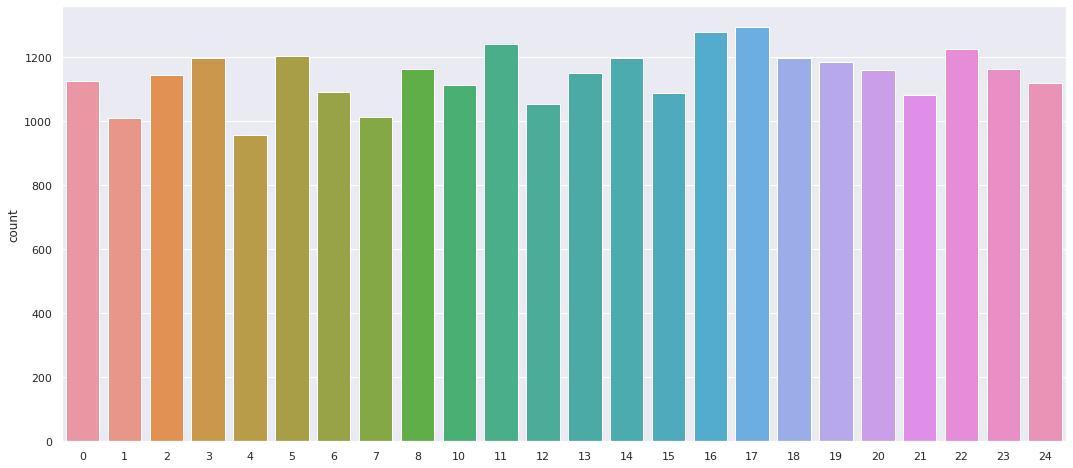

In [15]:
# train label distribution check
plt.figure(figsize = (18,8))
sns.set_theme(style="darkgrid")
sns.countplot(x =labels_train);

- train 데이터의 레이블(알파벳)이 비교적 균일하게 분포되어있습니다.


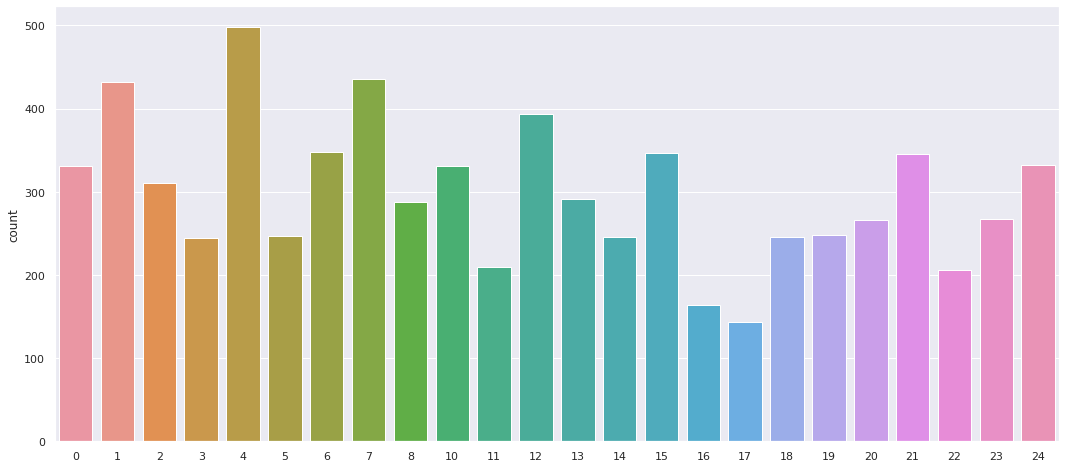

In [16]:
# test label distribution check
plt.figure(figsize = (18,8))
sns.set_theme(style="darkgrid")
sns.countplot(x =labels_test);

- test 데이터의 레이블(알파벳)의 분포를 확인합니다.

## Train, Validation, Test Split

In [17]:
# Defining X and Ys
X_train = train.iloc[:,1:].copy()
y_train = train.iloc[:,0].copy()

X_test = test.iloc[:,1:].copy()
y_test = test.iloc[:,0].copy()

In [18]:
# Splitting training model into train and validation sets for deep learning model
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2)

## Normalizing

In [19]:
# Rescaling data to fall between 0 and 1
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

In [20]:
# Converting to Numpy array and Reshaping X_train and test data
X_train = np.array(X_train).reshape(X_train.shape[0], *(28, 28, 1))
X_val = np.array(X_val).reshape(X_val.shape[0], *(28, 28, 1))
X_test = np.array(X_test).reshape(X_test.shape[0], *(28, 28, 1))

In [21]:
# Categorizing Ys
y_train_cat = to_categorical(y_train, num_classes=25)
y_val_cat = to_categorical(y_val, num_classes=25)
y_test_cat = to_categorical(y_test, num_classes=25)

## Data Augmentation (데이터 증감)


In [22]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=15,  # randomly rotate images in the range 15 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.15,  # randomly shift images horizontally 15%
        height_shift_range=0.15,  # randomly shift images vertically 15%
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

- 데이터 증감 방식을 사용해서 train 데이터를 더욱 다양하고 풍부하게 만들어서 과적합(Overfitting) 을 방지합니다.

# 6. 딥러닝 방식 적용

# CNN Model - Baseline Model

In [23]:
# Model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))


In [24]:
# model compile
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [26]:
# validation data for baseline model
X_val_base = X_val.copy()
y_val_cat_base = y_val_cat.copy()

In [28]:
# model learning
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_val_base, y_val_cat_base))

Epoch 1/10
172/172 [==============================] - 22s 127ms/step - loss: 2.1864 - acc: 0.2992 - val_loss: 1.3335 - val_acc: 0.5941
Epoch 2/10
172/172 [==============================] - 21s 124ms/step - loss: 1.1609 - acc: 0.6144 - val_loss: 0.6464 - val_acc: 0.8131
Epoch 3/10
172/172 [==============================] - 21s 123ms/step - loss: 0.7430 - acc: 0.7444 - val_loss: 0.3864 - val_acc: 0.8905
Epoch 4/10
172/172 [==============================] - 21s 123ms/step - loss: 0.5248 - acc: 0.8187 - val_loss: 0.2214 - val_acc: 0.9428
Epoch 5/10
172/172 [==============================] - 21s 123ms/step - loss: 0.3823 - acc: 0.8698 - val_loss: 0.1497 - val_acc: 0.9628
Epoch 6/10
172/172 [==============================] - 21s 123ms/step - loss: 0.2973 - acc: 0.8976 - val_loss: 0.0973 - val_acc: 0.9791
Epoch 7/10
172/172 [==============================] - 21s 123ms/step - loss: 0.2371 - acc: 0.9225 - val_loss: 0.0731 - val_acc: 0.9845
Epoch 8/10
172/172 [==============================] - 2

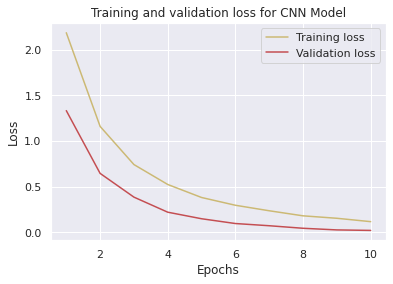

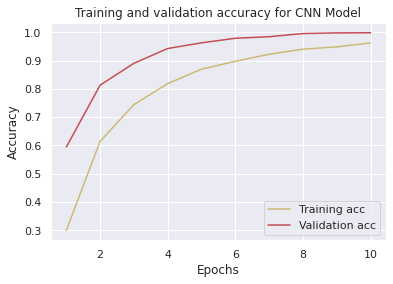

In [29]:
# trainig and validation's accuracy and loss를 graphing per epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Validation 과 Train의 Accuracy와 Loss를 확인합니다.
- Validation의 Accuracy와 Loss 모두 Train 보다 높음을 알 수 있습니다.

In [30]:
# Apply to test dataset
X_test_base = X_test.copy()
predict = model.predict(X_test_base) 
classes = np.argmax(predict, axis=1)

In [31]:
# test accuracy check
y_test_base = y_test.copy()
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_base, classes)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.9127161182375906


Predicted Label:  G
True Label:  H


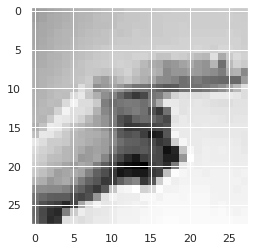

In [48]:
# Check images correspond with alphabet when randomly chosen 
i = random.randint(1,len(classes))
plt.imshow(X_test_base[i,:,:,0], cmap='gray') 
print("Predicted Label: ", class_names[int(classes[i])])
print("True Label: ", class_names[int(y_test[i])])

- 단일 CNN 모델로 수화 이미지를 알파벳으로 어떻게 예측하는지 랜덤으로 뽑아서 확인해봤습니다.
- 위에 처럼 오류가 간혈적으로 나타나는 것을 확인할 수 있습니다.

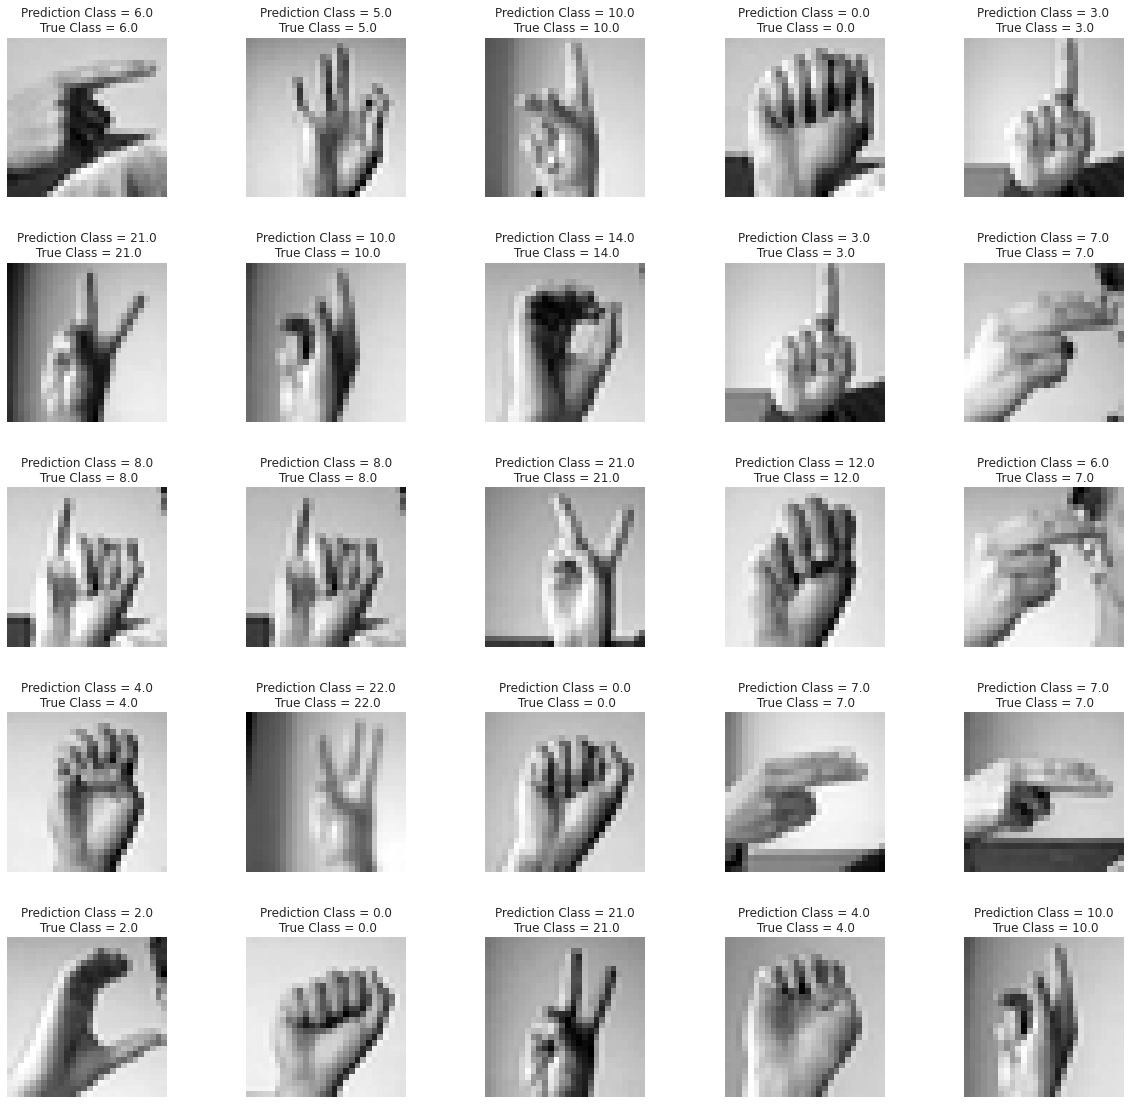

In [52]:
# Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test_base[i,:,:,0], cmap='gray')
    axes[i].set_title(f"Prediction Class = {classes[i]:0.1f}\n True Class = {y_test_base[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

- 좀 더 많은 샘플을 예측했을 떄에도 오른쪽 끝에서 3번째처럼 예측을 잘못하는 경우를 발견할 수 있습니다.

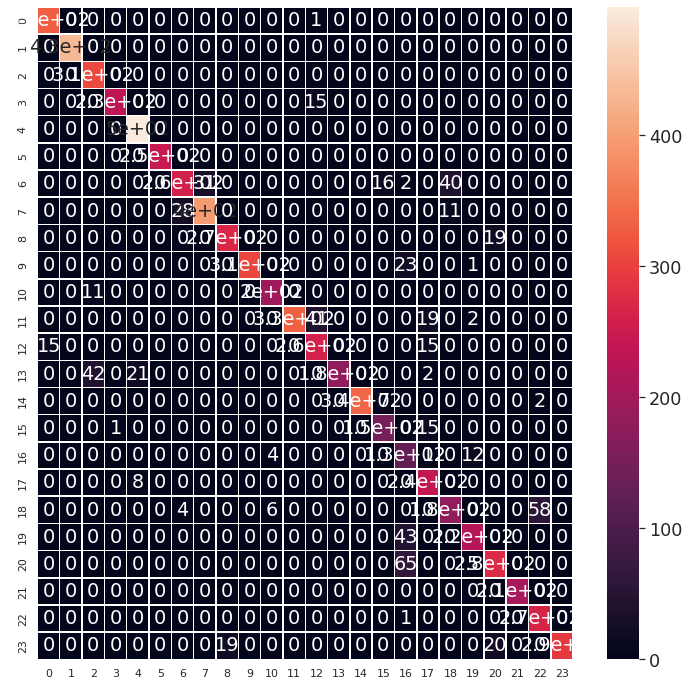

In [53]:
# Confusion matrix
cm_base = confusion_matrix(y_test_base, classes)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm_base, annot=True, linewidths=.5, ax=ax);

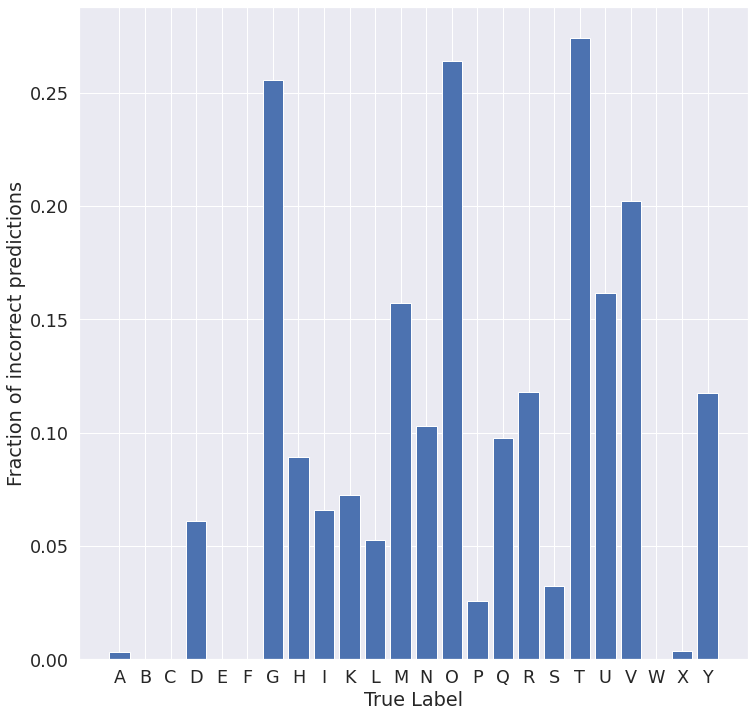

In [55]:
# PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm_base) / np.sum(cm_base, axis=1);
fig, ax = plt.subplots(figsize=(12,12));
plt.bar(np.arange(24), incorr_fraction);
plt.xlabel('True Label');
plt.ylabel('Fraction of incorrect predictions');
plt.xticks(np.arange(24), class_names);

# Ensemble Model
- 지금까지 하나의 CNN 모델의 성능을 확인했습니다. 현재의 성능또한 Chance level(4%) 보다 훨씬 성능이 좋습니다. 하지만 여기서 더 성능을 높일 순 없을지 궁금했습니다. 더 좋은 성능을 내기위해 앙상블 모델을 사용해서 성능을 비교해보겠습니다.
- 앙상블 모델 학습은 신경망 모델의 분산을 줄이고 단일 모델 대신 여러 모델을 교육하고 이러한 모델의 예측을 결합해서 단일 모델보다 우수한 예측 결과를 얻을 수 있는 모델링 방법입니다.

Model 1


---
- MaxPooling2D

In [56]:
# Model1

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Conv2D(25, (1,1)))

model1.add(Flatten())

model1.add(Dense(25, activation = 'softmax'))


In [57]:
model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 25)        1625      
                                                                 
 flatten_1 (Flatten)         (None, 2500)              0         
                                                      

In [58]:
history1 = model1.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_val, y_val_cat))

Epoch 1/10
172/172 [==============================] - 41s 234ms/step - loss: 1.1444 - acc: 0.6640 - val_loss: 0.2841 - val_acc: 0.9171
Epoch 2/10
172/172 [==============================] - 40s 232ms/step - loss: 0.1357 - acc: 0.9616 - val_loss: 0.0565 - val_acc: 0.9854
Epoch 3/10
172/172 [==============================] - 40s 232ms/step - loss: 0.0282 - acc: 0.9942 - val_loss: 0.0101 - val_acc: 0.9989
Epoch 4/10
172/172 [==============================] - 40s 232ms/step - loss: 0.0077 - acc: 0.9988 - val_loss: 0.0153 - val_acc: 0.9949
Epoch 5/10
172/172 [==============================] - 40s 232ms/step - loss: 0.0186 - acc: 0.9942 - val_loss: 0.0221 - val_acc: 0.9922
Epoch 6/10
172/172 [==============================] - 40s 233ms/step - loss: 0.0147 - acc: 0.9963 - val_loss: 0.0016 - val_acc: 0.9998
Epoch 7/10
172/172 [==============================] - 40s 233ms/step - loss: 0.0010 - acc: 0.9999 - val_loss: 9.9276e-04 - val_acc: 0.9998
Epoch 8/10
172/172 [==============================]

In [59]:
model1.save('saved_models/model1.hdf5')

Model 2


---
- MaxPooling2D
- Dropout(0.2)


In [60]:
#Model 2

#Defining the Convolutional Neural Network
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(25, activation = 'softmax'))

In [61]:
model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [62]:
history2 = model2.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_val, y_val_cat))

Epoch 1/10
172/172 [==============================] - 22s 123ms/step - loss: 2.7586 - acc: 0.1586 - val_loss: 1.7949 - val_acc: 0.4425
Epoch 2/10
172/172 [==============================] - 21s 123ms/step - loss: 1.4600 - acc: 0.5212 - val_loss: 0.8026 - val_acc: 0.7603
Epoch 3/10
172/172 [==============================] - 21s 123ms/step - loss: 0.8633 - acc: 0.7098 - val_loss: 0.4559 - val_acc: 0.8765
Epoch 4/10
172/172 [==============================] - 21s 123ms/step - loss: 0.5961 - acc: 0.7971 - val_loss: 0.2652 - val_acc: 0.9201
Epoch 5/10
172/172 [==============================] - 21s 123ms/step - loss: 0.4329 - acc: 0.8535 - val_loss: 0.1818 - val_acc: 0.9572
Epoch 6/10
172/172 [==============================] - 21s 122ms/step - loss: 0.3255 - acc: 0.8901 - val_loss: 0.1140 - val_acc: 0.9740
Epoch 7/10
172/172 [==============================] - 21s 122ms/step - loss: 0.2604 - acc: 0.9121 - val_loss: 0.0818 - val_acc: 0.9876
Epoch 8/10
172/172 [==============================] - 2

In [63]:
model2.save('saved_models/model2.hdf5')

Model 3


---
- More Dense Layers
- Relu Activation Function
- Early Stopping


In [64]:
#Model 3
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(25, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(25, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(25, activation = 'softmax'))

In [65]:
# Model Copile
model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])

# Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Model Summary
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         

In [66]:
# Model3 학습시키기
history3 = model3.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_val, y_val_cat), callbacks=early_stop)

Epoch 1/10
172/172 [==============================] - 19s 109ms/step - loss: 2.9827 - acc: 0.1068 - val_loss: 2.1499 - val_acc: 0.3513
Epoch 2/10
172/172 [==============================] - 19s 111ms/step - loss: 2.0185 - acc: 0.3310 - val_loss: 1.1979 - val_acc: 0.6988
Epoch 3/10
172/172 [==============================] - 19s 111ms/step - loss: 1.4685 - acc: 0.5010 - val_loss: 0.7353 - val_acc: 0.8130
Epoch 4/10
172/172 [==============================] - 19s 110ms/step - loss: 1.1975 - acc: 0.5859 - val_loss: 0.5424 - val_acc: 0.8871
Epoch 5/10
172/172 [==============================] - 19s 110ms/step - loss: 1.0478 - acc: 0.6354 - val_loss: 0.4132 - val_acc: 0.9179
Epoch 6/10
172/172 [==============================] - 19s 110ms/step - loss: 0.9254 - acc: 0.6768 - val_loss: 0.3440 - val_acc: 0.9352
Epoch 7/10
172/172 [==============================] - 19s 111ms/step - loss: 0.8305 - acc: 0.7079 - val_loss: 0.2664 - val_acc: 0.9647
Epoch 8/10
172/172 [==============================] - 1

In [67]:
# model3 save
model3.save('saved_models/model3.hdf5')

## Model average / sum Ensemble


---



In [68]:
# Ensemble Model
model1 = load_model('saved_models/model1.hdf5')
model2 = load_model('saved_models/model2.hdf5')
model3 = load_model('saved_models/model3.hdf5')

models = [model1, model2, model3]

#preds = [model.predict(X_test) for model in models]
preds = [model.predict(X_val) for model in models]

In [69]:
preds = np.array(preds)
summed = np.sum(preds, axis=0)

In [70]:
# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

predict_1 = model1.predict(X_val) 
classes_1 = np.argmax(predict_1, axis=1)
predict_2 = model2.predict(X_val) 
classes_2 = np.argmax(predict_2, axis=1)
predict_3 = model3.predict(X_val) 
classes_3 = np.argmax(predict_3, axis=1)

accuracy1 = accuracy_score(y_val, classes_1)
accuracy2 = accuracy_score(y_val, classes_2)
accuracy3 = accuracy_score(y_val, classes_3)
ensemble_accuracy = accuracy_score(y_val, ensemble_prediction)

In [71]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.9998178838098707
Accuracy Score for model2 =  0.9987251866690949
Accuracy Score for model3 =  0.9890730285922419
Accuracy Score for average ensemble =  1.0


## Weighted average ensemble


---



In [72]:
models = [model1, model2, model3]
preds = [model.predict(X_val) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

In [73]:
#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(y_val, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.9998178838098707
Accuracy Score for model2 =  0.9987251866690949
Accuracy Score for model3 =  0.9890730285922419
Accuracy Score for average ensemble =  1.0
Accuracy Score for weighted average ensemble =  1.0


# 6. Hyperparameter Optimization - Grid Search

## Grid Search


---


- Grid Search 를 통해 가장 최고의 accuracy 를 만드는 w1, w2, w3 의 조합을 찾습니다.

In [74]:
# Create 'weight' and 'accuracy' data frames to find the optimal weight for the ensemble model.
models = [model1, model2, model3]
preds1 = [model.predict(X_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(y_test, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)

In [75]:
# dataframe check
df

,wt1,wt2,wt3,acc
0,0.0,0.0,0.0,4.615170
1,0.0,0.0,0.1,87.827663
2,0.0,0.0,0.2,87.827663
3,0.0,0.0,0.3,87.827663
4,0.0,0.0,0.4,87.827663
...,...,...,...,...
120,0.4,0.4,0.0,88.970998
121,0.4,0.4,0.1,91.438929
122,0.4,0.4,0.2,91.815393
123,0.4,0.4,0.3,92.177914


In [76]:
# The Best Accuracy with ideal weights
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])

Max accuracy of  95.80312325711098  obained with w1= 0.1  w2= 0.4  and w3= 0.3


- 가장 최고의 Accuracy를 갖는 조합은 w1, w2, w3 = (0.1, 0.4, 0.3) 임을 알 수 있습니다.

# 7. Chance Level 및 base line 이 넘는지 확인

 Explore metrics for the ideal weighted ensemble model. 

In [77]:
models = [model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.1, 0.4, 0.3] 

# Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(y_test, ideal_weighted_ensemble_prediction)
print(ideal_weighted_accuracy)

0.9580312325711099


In [86]:
chance_level = 1/25 * 100
print(chance_level, '%')

4.0 %


- Chance Level 은 0.04(4%) 이므로 충분히 넘습니다.
- Ensemble Mode 은 0.95로 Baseline model 의 성능인 0.91 보다도 높은 성능을 나타냅니다.
- 결론적으로 Ensemble이 가설에서 예상한 것처럼 굉장히 좋은 성능을 가진 모델임을 알 수 있습니다.

Predicted Label:  Q
True Label:  Y


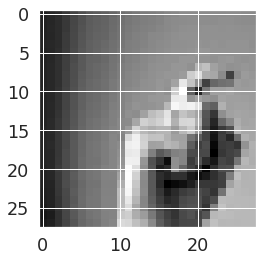

In [81]:
# Check images correspond with alphabet when randomly chosen
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(X_test[i,:,:,0], cmap='gray') 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

- 높은 성능임에도 불구하고 위와 같은 오류가 나타나는 것을 확인할 수 있습니다.

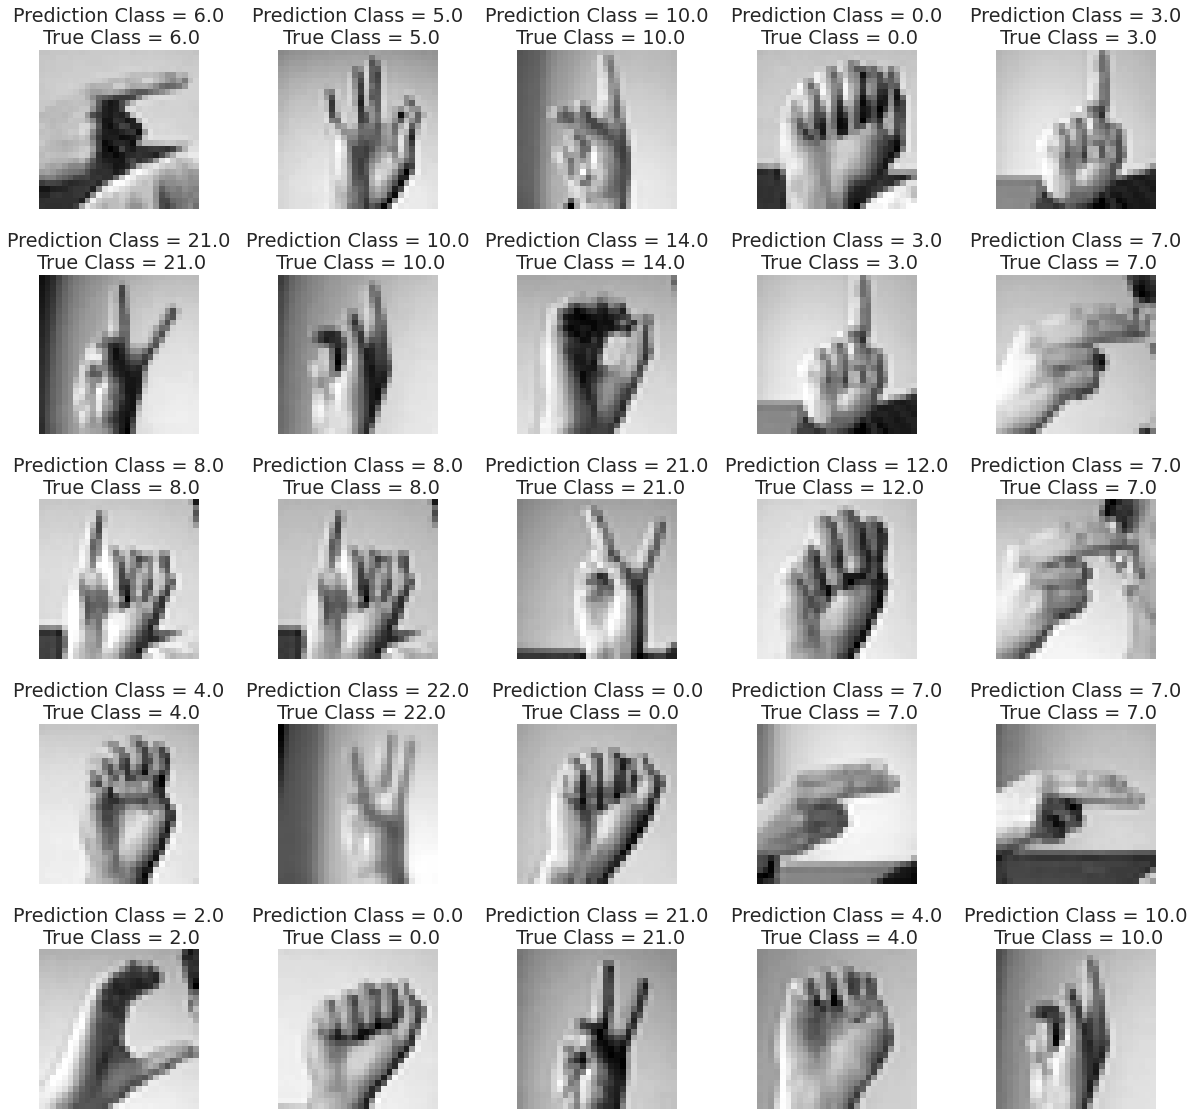

In [83]:
# Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28), cmap='gray')
    axes[i].set_title(f"Prediction Class = {ideal_weighted_ensemble_prediction[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

- 위의 예측 결과를 통해 모델이 정확하게 수화 이미지를 알맞은 알파벳을 예측했음을 알 수 있습니다.

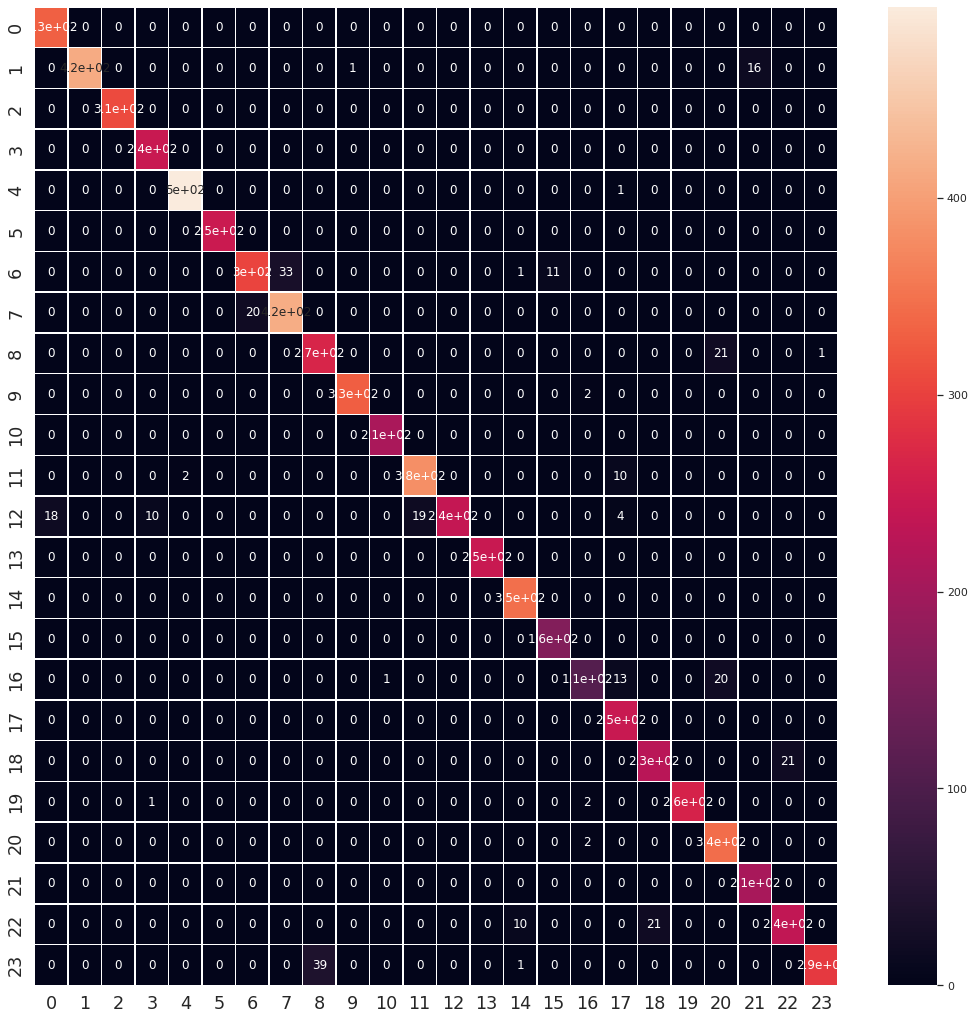

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Print confusion matrix
cm = confusion_matrix(y_test, ideal_weighted_ensemble_prediction);

fig, ax = plt.subplots(figsize=(18,18));
sns.set(font_scale=1);
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax);

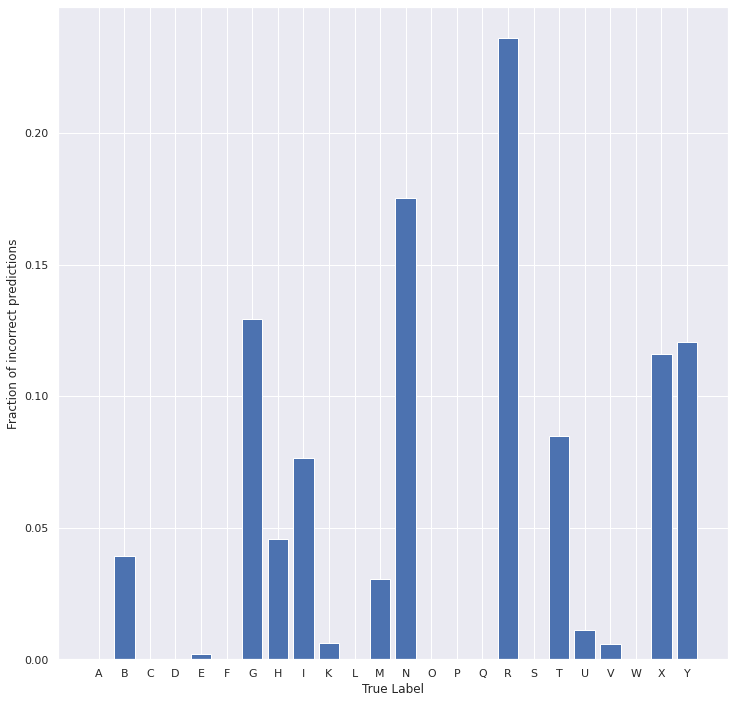

In [85]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12));
plt.bar(np.arange(24), incorr_fraction);
plt.xlabel('True Label');
plt.ylabel('Fraction of incorrect predictions');
plt.xticks(np.arange(24), class_names); 

- 단일 CNN 모델의 오류 그래프와 비교했을 떄 전반적으로 오류가 많이 줄어들었음을 확인할 수 있습니다.

# 8. (Option) Requirements.txt 제작 및 재구현

In [88]:
pip freeze > requirements.txt

# 9. 한계점과 추후 해결 및 성장 방안
- 한계점
  - Dataset 의 한계 : Train 과 Test 데이터셋이 굉장히 비슷한 사진들이고 하나의 채널을 갖는 흑백사진입니다. 그래서 만약 실제 일상생활의 다양한 색감의 배경 속에서도 위와 같은 높은 성능으로 모델이 수화를 정확한 언어로 예측할지 알 수 없습니다. 
  - 더 다양한 모델과 앙상블 : VGG16, Resnet50, Alexnet 등 다양한 딥러닝 기술들을 활용하지 못한 것이 아쉽습니다. 3일이라는 시간안에 주제를 정하고 데이터를 고르기까지 많은 시간을 할애해서 정작 더 다양한 모델 기법을 사용하지 못한 것이 너무 아쉽습니다.

- 해결 및 성장 방안
  - Real-time 으로 수화를 인지할 수 있는 모델 : 단순한 이미지를 인지하는 것 뿐만 아니라 실시간으로 사람의 수화 움직임을 바로바로 인지해서 해석할 수 있는 모델을 만들고 싶습니다. 그렇다면 더이상 '수화'라는 언어의 장벽때문에 단절되었던 청각장애인과 비청각장애인들이 서로 이해하고 소통할 수 있는 보다 나은 세상을 만들 수 있을 것입니다. 이를 위해서 다음과 같은 발전 방향이 필요로 될 것입니다.
    - 더 다양한 수화 이미지 데이터로 모델 학습시키기
    - 객체 인지 모델 학습시키기
    - 파파고나 구글 번역기와 같은 앱으로 만들어서 사람들이 쉽게 사용할 수 있게 하기